In [2]:
import torch 
import torch.nn as nn
from torch.optim import SGD 
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# Create a 128x128 RGB image tensor with random pixel values between 0 and 255
rgb_image_tensor = torch.randint(0, 256, (3, 128, 128), dtype=torch.uint8)
# Create a batch of 64 RGB images with dimensions 32x32 pixels
image_batch = torch.randint(0, 256, (64, 3, 32, 32), dtype=torch.uint8)

print(image_batch)

tensor([[[[242,  35,  78,  ..., 178,  67, 171],
          [ 99, 160,  40,  ...,  93,  48,  94],
          [ 37, 109, 218,  ..., 110,  52,  88],
          ...,
          [ 98, 122,  46,  ..., 213,   4, 151],
          [187,  36,  74,  ...,  68,  25, 186],
          [191,  44, 190,  ..., 224,  71,  61]],

         [[ 23,  24,   0,  ...,  79, 182, 153],
          [ 26, 155, 233,  ..., 207,  49,  16],
          [120, 254, 116,  ...,  58, 190,  48],
          ...,
          [ 95, 115, 138,  ...,  47, 195, 151],
          [ 92, 238, 175,  ...,   3,  94, 105],
          [134,  18,  79,  ...,   2,  18,  29]],

         [[216, 159,  23,  ..., 119,  36,  41],
          [234, 194, 173,  ..., 216, 243,  88],
          [ 20, 113, 238,  ..., 135, 115, 241],
          ...,
          [231,  24,  70,  ..., 212,  75, 194],
          [ 78, 203,  91,  ..., 251, 143,  40],
          [126, 174, 224,  ..., 109, 199,  75]]],


        [[[244, 128,  88,  ..., 110, 254,   9],
          [ 45,  69,  49,  ..., 230

In [4]:
x, y = torch.load(r'C:\Users\Seiven\Desktop\MY_MLmodels\MNIST_practice\MNIST\processed\training.pt')

In [5]:
print("X shape: " + str(x.shape)+ str(type(x)))
print("Y shape: " + str(y.shape)+ str(type(y)))


X shape: torch.Size([60000, 28, 28])<class 'torch.Tensor'>
Y shape: torch.Size([60000])<class 'torch.Tensor'>


<function matplotlib.pyplot.show(close=None, block=None)>

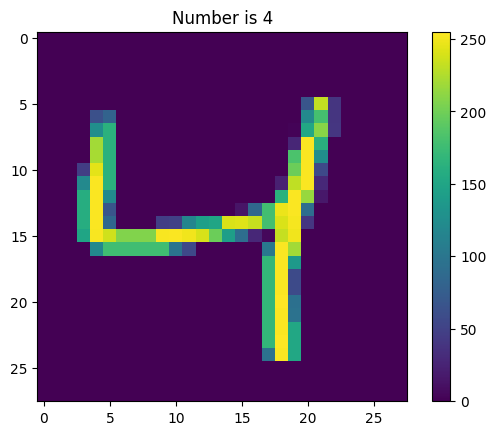

In [6]:
plt.imshow(x[2].numpy())
plt.title(f'Number is {y[2].numpy()}')
plt.colorbar()
plt.show

In [7]:
y_original = torch.tensor([2, 4, 3, 0, 1])
y_new = F.one_hot(y_original)

In [8]:
y_original


tensor([2, 4, 3, 0, 1])

In [9]:
y_new

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])

In [10]:
x.shape
x.view(-1,28**2).shape

torch.Size([60000, 784])

PyTorch Dataset Object


In [11]:
class CTDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x=self.x/255.
        self.y=F.one_hot(self.y,num_classes=10).to(float)
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [12]:
train_ds = CTDataset('C:\\Users\\Seiven\\Desktop\\MY_MLmodels\\MNIST_practice\\MNIST\\processed\\training.pt')
test_ds = CTDataset('C:\\Users\\Seiven\\Desktop\\MY_MLmodels\\MNIST_practice\\MNIST\\processed\\test.pt')

In [13]:
len(train_ds)

60000

In [14]:
xs, ys = train_ds[0:4]

In [15]:
ys.shape

torch.Size([4, 10])

PyTorch DataLoader Object


In [16]:
train_dl = DataLoader(train_ds, batch_size=5)
for x,y in train_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([5, 28, 28])
torch.Size([5, 10])


In [17]:
len(train_dl)

12000

Cross Entropy Loss

In [18]:
L=nn.CrossEntropyLoss()

The Network

In [31]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2, 100)
        self.Matrix2 = nn.Linear(100, 50)
        self.Matrix3 = nn.Linear(50, 10)
        self.R = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28**2) # is a PyTorch method used to reshape a tensor without changing its data
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()


In [32]:
f = MyNeuralNet()

In [33]:
xs.shape

torch.Size([4, 28, 28])

In [38]:
f(xs)

tensor([[-0.0636,  0.0900,  0.0617,  0.0200,  0.0238, -0.0291, -0.1549,  0.1227,
         -0.0672,  0.0929],
        [-0.0621,  0.0654,  0.0919,  0.0479, -0.0031, -0.0485, -0.1593,  0.1049,
         -0.0614,  0.0863],
        [-0.0872,  0.0385,  0.1305,  0.0425,  0.0224, -0.0503, -0.1288,  0.0612,
         -0.0331,  0.0932],
        [-0.0965,  0.0970,  0.1067,  0.0218, -0.0256, -0.0418, -0.1587,  0.1256,
         -0.0930,  0.0906]], grad_fn=<SqueezeBackward0>)

In [39]:
ys

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [40]:
L(f(xs), ys)

tensor(2.3059, dtype=torch.float64, grad_fn=<DivBackward1>)

In [45]:
def train_model(dl, f, n_epochs=20):  # data loader, f = MyNeuralNet()
    # optimization
    # Stochastic Gradient Descent, learning rate
    opt = SGD(f.parameters(), lr=0.01)
    L = nn.CrossEntropyLoss()

    # Train model
    losses = []
    epochs = []
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        N = len(dl)
        for i, (x, y) in enumerate(dl):
            # Update the weight of the network
            opt.zero_grad()
            loss_value = L(f(x), y) 
            loss_value.backward()
            opt.step()
            # Store training data
            epoch.append(loss_value.item())
            losses.append(loss_value.item())
    return np.array(epochs), np.array(losses)



In [46]:
epoch_data, loss_data = train_model(train_dl, f)
#NEED TO FIX THIS

Epoch 0


AttributeError: 'int' object has no attribute 'append'